# DS07 Data Science with Python - Support Vector Machine
In this workshop we continue using the Sci-Kit Learn library. This time we look into the support vector machine.
### Importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm

### Reading the Data 
The two code cells below generate a data frame from the "RedBlue.csv" file and plot the data. Run both these code cells.

In [2]:
# Creates a data frame from the "RedBlue.csv" file
df = pd.read_csv("RedBlue.csv")
df

,x,y,Colour
0,10.4,8.8,blue
1,4.6,5.8,red
2,11.2,9.0,blue
3,9.8,11.4,blue
4,11.0,11.8,blue
5,8.4,10.4,blue
6,3.8,4.6,red
7,8.6,11.2,blue
8,8.4,8.0,blue
9,5.0,6.8,red


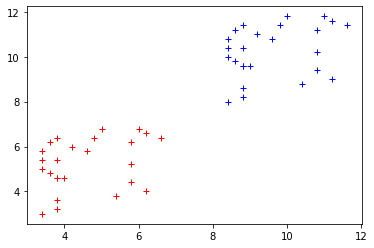

In [3]:
# Splits rows based on the colour in the "Colour" column
red = df.loc[df["Colour"] == "red"]
blue =  df.loc[df["Colour"] == "blue"]

# Plots the red data and the blue data
plt.plot(red["x"],red["y"],"r+")
plt.plot(blue["x"],blue["y"],"b+")

### The Problem
As you can see in the plot above we have data seperated into two sets. In this data set there is a red set and a blue set. More generally we could have other ways of distinguishing two groups ie the two groups could represent two different blood types for example or perhaps whether a particular project is successful or not. What if we had another point or set of points that were not yet assigned to red or blue? How would we determine which group they belong to? One could do this by eye of course but if you had to many points to classify this is not ideal. Do we have a better more quantitative way classifying these points? In this workshop we will explore one such approach to classifying these data points.

## Support Vector Machine (SVM)
As an alternative to the K nearest neighbours algorithm we could use a support vector machine or SVM for short. Once again we seek to classify our data in some way. A SVM works by finding a boundary that seperates your two data sets. In the case above it finds the straight line that is as far as possible from both the blue and red data sets as it can be. When given an unseen point, the SVM checks to see which side of the line the data appears on. If the data is on the side featuring the blue data it will classify the point blue. If on the side with the red data the SVM assigns it to the red group. 
### Preprocessing 
The preprocessing stage here is identical to that used for the K nearest neighbour algorithm in workshop DS06.

In [4]:
# Independent variables
X = df.drop("Colour", axis=1)

# Dependent variable 
y = df["Colour"]

# Allocates 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Training and Scoring
Once again, very similar to the K nearest neighbours algorithm. The only difference we've made is in how we've defined the c initially by choosing a different algorithm. Here we define it ````svm.SVC```` where the SVC stands for support vector classifier. The ````gamma='auto'```` argument specifies a coefficient for whats called a kernel. We will discuss kernals later in the workshop. Training for an SVM involves determining where the seperating boundary or line in this case between the two groups is. Making a prediction merely involves determining the position of the unseen data with respect to this boundary. Our score should once again be $1$ as our data groups are easily distinguishable.

In [7]:
# Chooses the support vector machine algorithm for our classifier
clf = svm.SVC(gamma='auto')


# Training the classifier
clf_trained = clf.fit(X_train,y_train)

# Scoring the classifier
clf_trained.score(X_test,y_test)

1.0

### Making Predictions
Here we will pass a few unseen test points into our classifier to see what it predicts.
#### [10,10]
Quite clearly in the blue region so our model should return blue.

In [8]:
# Defining an unclassified point 
test_point = np.array([[10,10]])

# Making a prediction
clf_trained.predict(test_point)

array(['blue'], dtype=object)

#### [5,5]
Quite clearly in the red region so our model should return red.

In [9]:
# Defining an unclassified point 
test_point = np.array([[5,5]])

# Making a prediction
clf_trained.predict(test_point)

array(['red'], dtype=object)

## More than 2 Classes?
In the data set above we were only considered two classes of data. What would happen if we had to classify between three groups of data or more? Below we consider a set of data with a third group. We apply the support vector machine in exactly the same way, however this time we will consider an additional argument.

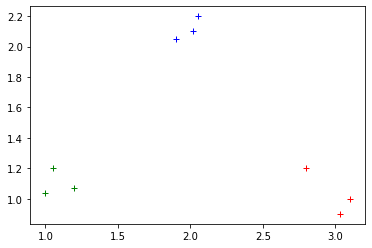

In [10]:
# Generates data frame from csv
df = pd.read_csv("RedBlueGreen.csv")

# Splitting the colours
red = df.loc[df["Colours"] == "red"]
blue = df.loc[df["Colours"] == "blue"]
green = df.loc[df["Colours"] == "green"]

# Plotting
plt.plot(green["x"],green["y"],"g+")
plt.plot(blue["x"],blue["y"],"b+")
plt.plot(red["x"],red["y"],"r+")

As this data is in three groups we cannot simply find one line that seperates the groups. In this case we will need to find multiple lines. There are two methods of doing so. The first is to consider one group at a time whilst treating the rest of the data as if it were one whole group. This is called one vs rest. We do this for each group so that we have a line seperating that group and the rest of the data. Alternatively, we can consider the boundary between each individual group. In this case we could consider red vs green then red vs blue and blue vs green finding a line seperating each case. This is called one vs one. We can specify which of these methods to choose when passing ````sv.SVC```` by using the ````decision_function_shape```` argument. Setting it to ````"ovo"```` selects the one vs one method. By default it is set to ````ovr```` which corresponds to one vs rest. Often it can be useful to test the outcomes of both these methods.

In [ ]:
# Independent variables
X = df.drop("Colours", axis=1) 

# Dependent variable
y = df["Colours"]

# Allocating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Choosing support vector machine for classifier
clf = svm.SVC(gamma="auto", decision_function_shape = "ovo")

# Training
clf_trained = clf.fit(X_train,y_train)

# Scoring
clf_trained.score(X_test,y_test)

## Kernels
The data sets we used in this workshop are very idealised examples. The data can easily be split into groups with a straight lines. But what about data posisitioned in a way that you would not be able to find a straight line between the groups. For instance, if I had one group in filling a circle and another group around that circle then no straight line would be able to seperate the data. In such cases we might be able to map our data to higher dimensions with what are called kernels. In these higher dimensions we might be able to find a straight surface that seperates the two groups. One can choose a kernal by passing the ````kernel=```` argument into ````svm.SVC````. The available options for this argument are ````'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’```` with ````'rbf'```` being the default. Don't worry too much about how they work but be aware they exist and that changing the kernel may improve or reduce the accuracy of your model. The following link provides a visualisation as to how a kernel might find a straight boundary that can seperate two seemingly inseperable groups: https://www.youtube.com/watch?v=3liCbRZPrZA.

## Label Encoding 

In [12]:
label = pd.read_excel("cycleaccidents.xlsx")
label

,Accident year,Local authority,Light condition,Weather condition,casualties/milkmtrafic2
0,2018,City of London,Daylight,Unknown,Safe
1,2018,City of London,Daylight,Fine no high winds,Dangerous
2,2018,City of London,Daylight,Raining no high winds,Safe
3,2018,Barking,Daylight,Fine no high winds,Dangerous
4,2018,Barking,Daylight,Raining no high winds,Safe
...,...,...,...,...,...
350,2018,Richmond upon Thames,Darkness - no lighting,Raining no high winds,Safe
351,2018,Richmond upon Thames,Darkness - no lighting,Raining + high winds,Safe
352,2018,Tower Hamlets,Darkness - no lighting,Fine no high winds,Safe
353,2018,Waltham Forest,Darkness - no lighting,Other,Safe


The dataset above represents the safety level of pedal cycle accidents / traffic in 2018 by 3 different conditions. This is  the ````casualties/milkmtrafic2```` column. The ````Local authority```` column represents the London local authority where that safety lavel is recorded. The ````Light condition````column represents the light condition where that safety level is recorded. The ````Weather condition```` column represents the weather where that safety level was recorded.

If we were to predict the safety level, ````casualties/milkmtrafic````, using our 3 predictors, we couldn't as the 3 columns are categorical and not numerical. However,it is possible to use them if we use label encoding. All the categories will be assign a number. 

We start by making duplicates of each predictor.

In [14]:
label['Local authority1']=label['Local authority']
label['Weather condition1']=label['Weather condition']
label['Light condition1']=label['Light condition']
label

,Accident year,Local authority,Light condition,Weather condition,casualties/milkmtrafic2,Local authority1,Weather condition1,Light condition1
0,2018,City of London,Daylight,Unknown,Safe,City of London,Unknown,Daylight
1,2018,City of London,Daylight,Fine no high winds,Dangerous,City of London,Fine no high winds,Daylight
2,2018,City of London,Daylight,Raining no high winds,Safe,City of London,Raining no high winds,Daylight
3,2018,Barking,Daylight,Fine no high winds,Dangerous,Barking,Fine no high winds,Daylight
4,2018,Barking,Daylight,Raining no high winds,Safe,Barking,Raining no high winds,Daylight
...,...,...,...,...,...,...,...,...
350,2018,Richmond upon Thames,Darkness - no lighting,Raining no high winds,Safe,Richmond upon Thames,Raining no high winds,Darkness - no lighting
351,2018,Richmond upon Thames,Darkness - no lighting,Raining + high winds,Safe,Richmond upon Thames,Raining + high winds,Darkness - no lighting
352,2018,Tower Hamlets,Darkness - no lighting,Fine no high winds,Safe,Tower Hamlets,Fine no high winds,Darkness - no lighting
353,2018,Waltham Forest,Darkness - no lighting,Other,Safe,Waltham Forest,Other,Darkness - no lighting


We create an array with the columns we want labeled.

In [15]:
encode=['Local authority','Light condition','Weather condition']
encode

['Local authority', 'Light condition', 'Weather condition']

We import Label Encoder and apply it to our 3 columns.

In [16]:
from sklearn.preprocessing import LabelEncoder


# Apply label encoder
label_encoder = LabelEncoder()
for col in set(encode):
    label[col] = label_encoder.fit_transform(label[col])

label

,Accident year,Local authority,Light condition,Weather condition,casualties/milkmtrafic2,Local authority1,Weather condition1,Light condition1
0,2018,6,4,8,Safe,City of London,Unknown,Daylight
1,2018,6,4,1,Dangerous,City of London,Fine no high winds,Daylight
2,2018,6,4,5,Safe,City of London,Raining no high winds,Daylight
3,2018,0,4,1,Dangerous,Barking,Fine no high winds,Daylight
4,2018,0,4,5,Safe,Barking,Raining no high winds,Daylight
...,...,...,...,...,...,...,...,...
350,2018,26,3,5,Safe,Richmond upon Thames,Raining no high winds,Darkness - no lighting
351,2018,26,3,4,Safe,Richmond upon Thames,Raining + high winds,Darkness - no lighting
352,2018,29,3,1,Safe,Tower Hamlets,Fine no high winds,Darkness - no lighting
353,2018,30,3,3,Safe,Waltham Forest,Other,Darkness - no lighting


Because we previously created duplicates, now you can see both the encoded and the original column. We can now use the encoded column to train a SVM to predict safety levels. 